<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/3week/winequality_white_MLP_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import numpy as np

In [4]:
# -----------------------------
# 1) 데이터 불러오기
# -----------------------------
file_path = "/content/winequality-white.csv"
df = pd.read_csv(file_path, sep=";")

In [5]:
X = df.drop("quality", axis=1)   # 독립변수
y = df["quality"]                # 종속변수 (다중 클래스)

In [6]:
from tensorflow.keras import layers, models
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values
# X = X.values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
# model = models.Sequential([
#     layers.Dense(128, activation="relu", input_shape=(X.shape[1],)),
#     layers.Dropout(0.3),

#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.3),

#     layers.Dense(64, activation="relu"),
#     layers.Dropout(0.2),

#     layers.Dense(Y.shape[1], activation="softmax")
# ])

#과적합 최대로~
model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4517 - loss: 1.3264 - val_accuracy: 0.5140 - val_loss: 1.0997
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5506 - loss: 1.0861 - val_accuracy: 0.5370 - val_loss: 1.0492
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5487 - loss: 1.0307 - val_accuracy: 0.5408 - val_loss: 1.0300
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5655 - loss: 1.0173 - val_accuracy: 0.5319 - val_loss: 1.0224
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5745 - loss: 1.0109 - val_accuracy: 0.5727 - val_loss: 1.0104
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5777 - loss: 0.9899 - val_accuracy: 0.5536 - val_loss: 0.9860
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5786 - loss: 0.9683 - val_accuracy: 0.5612 - val_loss: 1.0002
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5799 - loss: 0.9661 - val_accuracy: 0.5842 - val

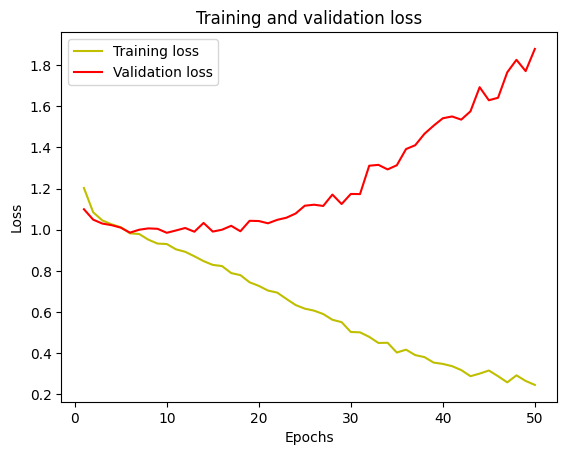

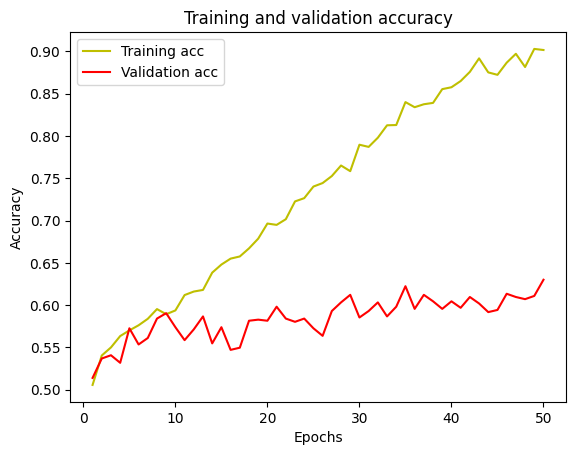

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.44      0.24      0.31        51
           2       0.65      0.60      0.62       295
           3       0.59      0.73      0.65       409
           4       0.60      0.49      0.54       183
           5       0.36      0.24      0.29        33

    accuracy                           0.60       980
   macro avg       0.44      0.38      0.40       980
weighted avg       0.59      0.60      0.59       980

[[  0   1   6   2   0   0]
 [  0  12  24  14   1   0]
 [  1  12 177 100   5   0]
 [  1   2  61 298  42   5]
 [  0   0   5  79  90   9]
 [  0   0   1  11  13   8]]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

---

---